In [1]:
cd /home/disk2/wdd/PDZ/12concentration

/home/disk2/wdd/PDZ/12concentration


In [17]:
import MDAnalysis as mda
from MDAnalysis.analysis import contacts

ModuleNotFoundError: No module named 'MDAnalysis'

In [52]:
chain=['A','B','C','D','E','F','G','H','I','J','K','L','M']
t_ref=mda.Universe('12con_ref.pdb',top='12con_ref.pdb')
group1=t_ref.select_atoms('segid A')
for nt in range(1,53):
    print nt
    trjname="trj/all/fit"+str(nt)+"_skip10.xtc"
    u=mda.Universe("begin.pdb",trjname)
    for i in range(1,13):
        filename='fit'+str(nt)+'_chain'+str(i)+'_Q.cs'
        wf=open(filename,'w')
        sel2='segid '+chain[i]
        print sel2
        group2=t_ref.select_atoms(sel2)
        nc=contacts.Contacts(u,selection=("segid A",sel2),refgroup=(group1,group2),method='soft_cut')
        nc.run()
        bound=nc.timeseries[:,1]
        for b in bound:
            wf.write(str(b)+'\n')
        wf.close()
        

2
segid B
segid C
segid D
segid E
segid F
segid G
segid H
segid I
segid J
segid K
segid L
segid M
3
segid B
segid C
segid D
segid E
segid F
segid G
segid H
segid I
segid J
segid K
segid L
segid M
4
segid B
segid C
segid D
segid E
segid F
segid G
segid H
segid I
segid J
segid K
segid L
segid M
5
segid B
segid C
segid D
segid E
segid F
segid G
segid H
segid I
segid J
segid K
segid L
segid M
6
segid B
segid C
segid D
segid E
segid F
segid G
segid H
segid I
segid J
segid K
segid L
segid M
7
segid B
segid C
segid D
segid E
segid F
segid G
segid H
segid I
segid J
segid K
segid L
segid M
8
segid B
segid C
segid D
segid E
segid F
segid G
segid H
segid I
segid J
segid K
segid L
segid M
9
segid B
segid C
segid D
segid E
segid F
segid G
segid H
segid I
segid J
segid K
segid L
segid M
10
segid B
segid C
segid D
segid E
segid F
segid G
segid H
segid I
segid J
segid K
segid L
segid M
11
segid B
segid C
segid D
segid E
segid F
segid G
segid H
segid I
segid J
segid K
segid L
segid M
12
segid B
segid C

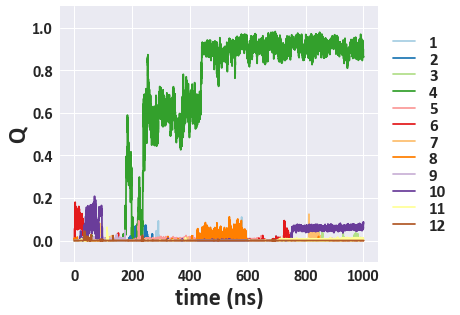

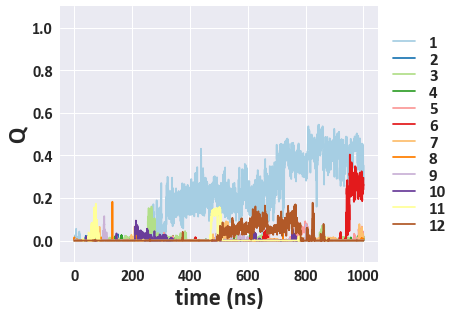

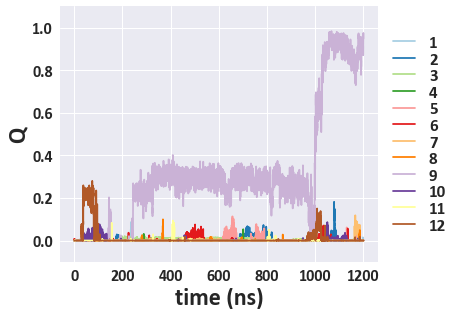

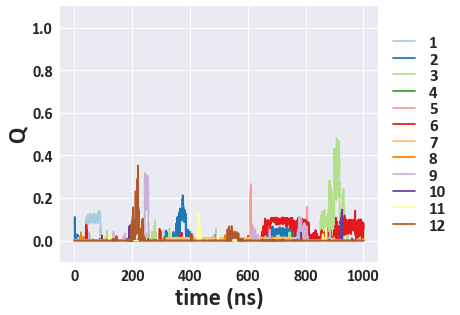

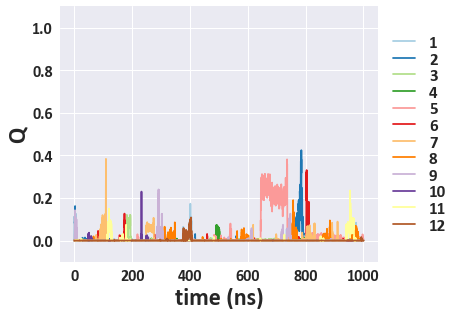

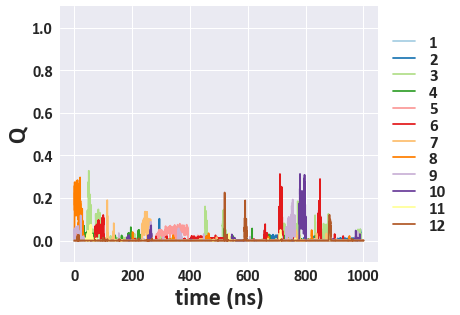

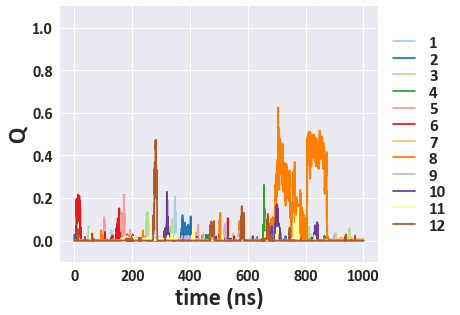

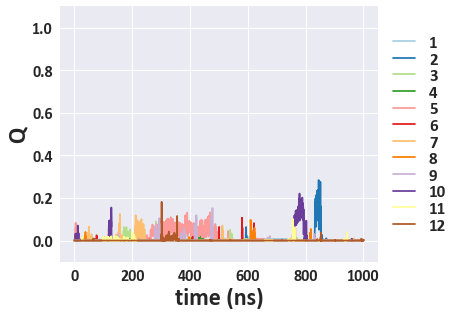

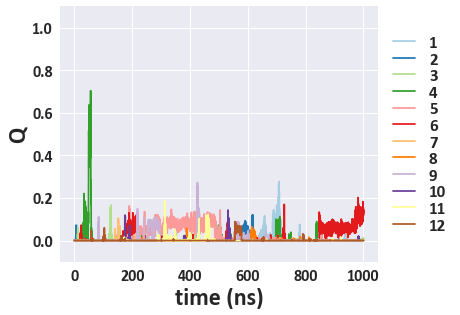

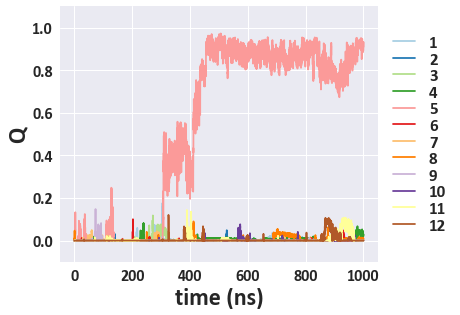

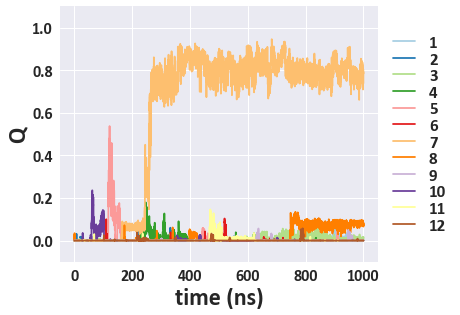

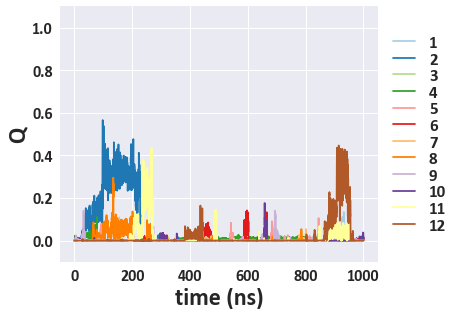

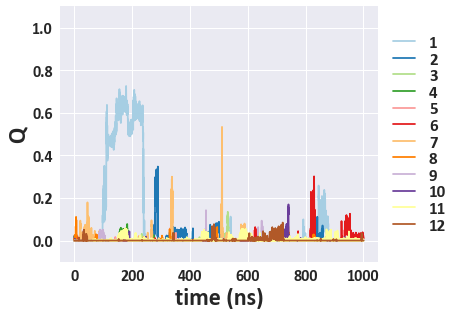

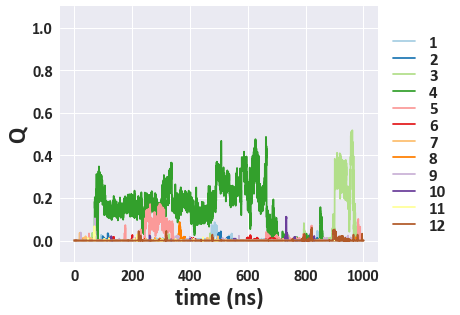

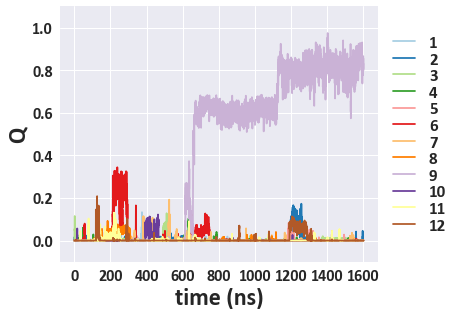

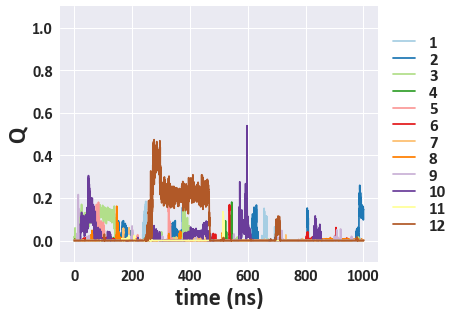

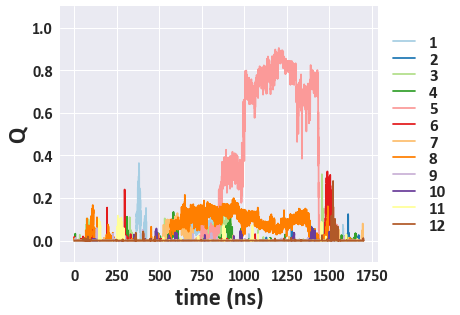

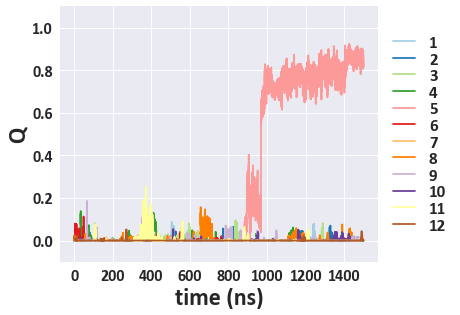

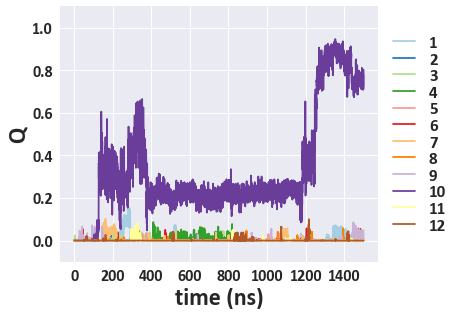

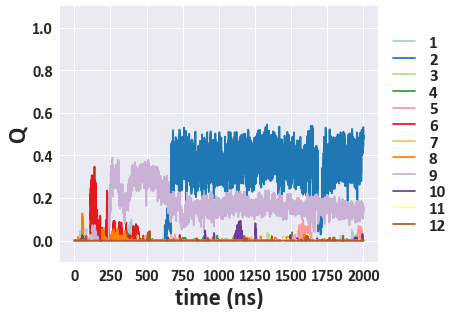

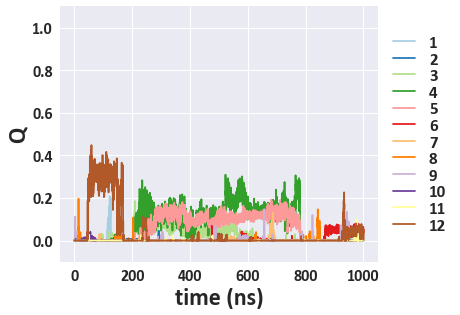

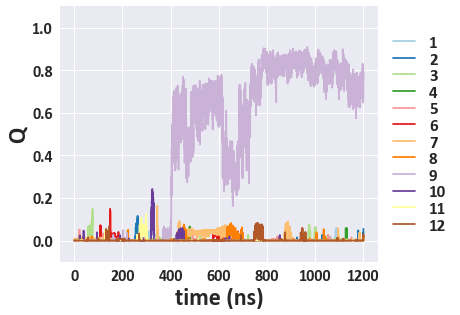

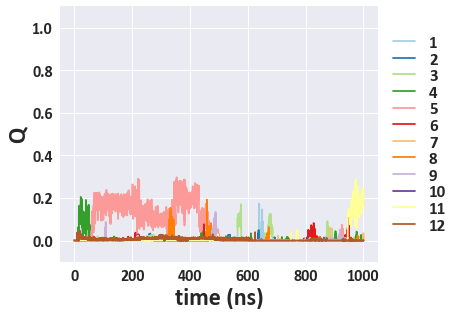

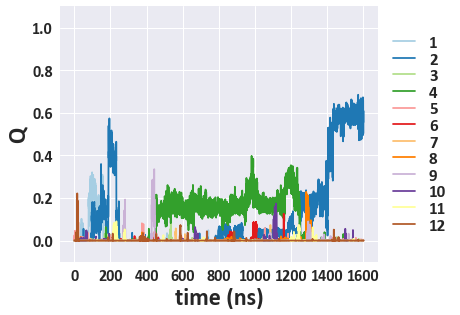

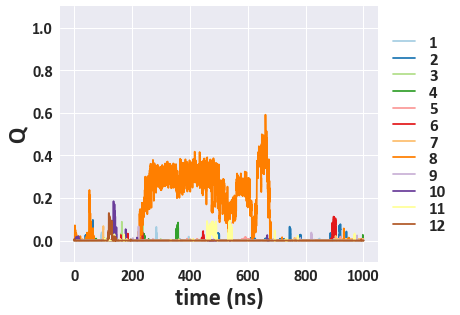

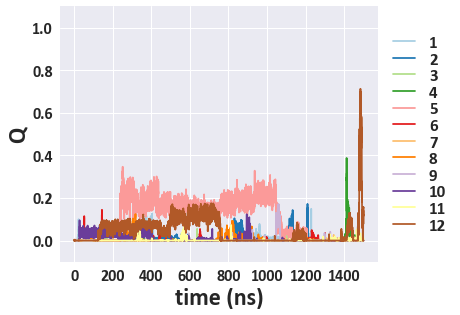

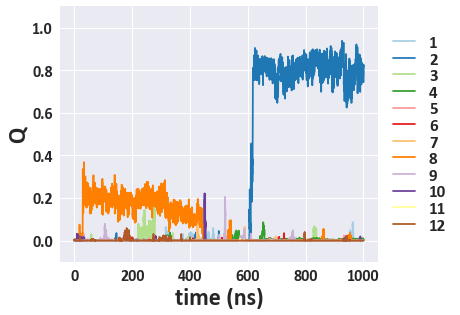

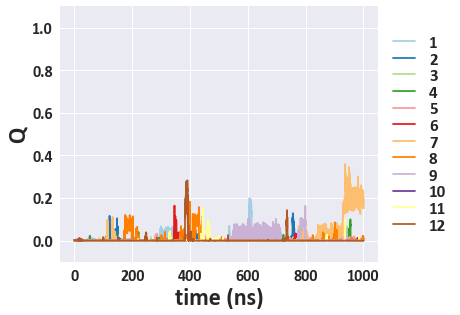

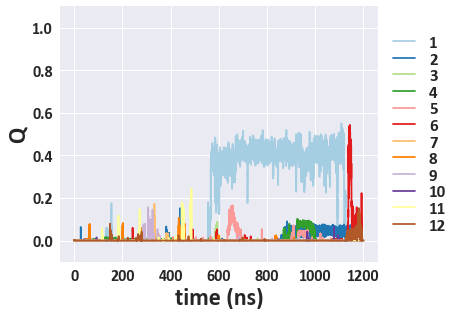

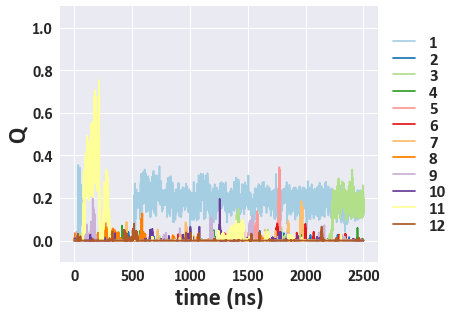

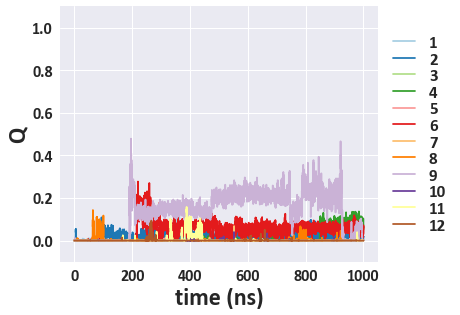

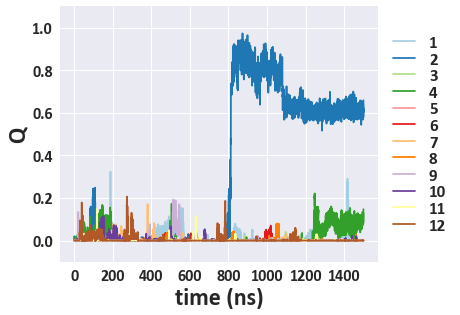

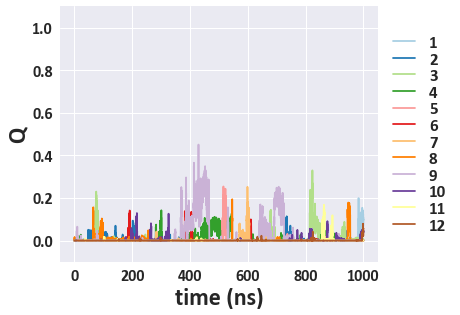

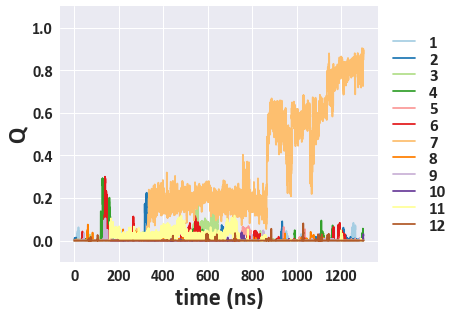

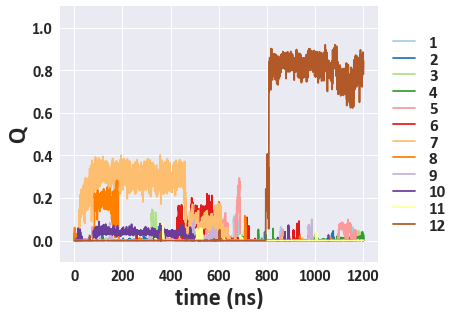

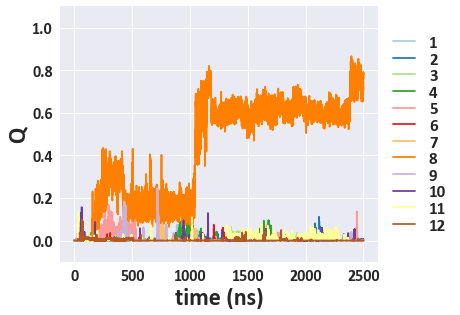

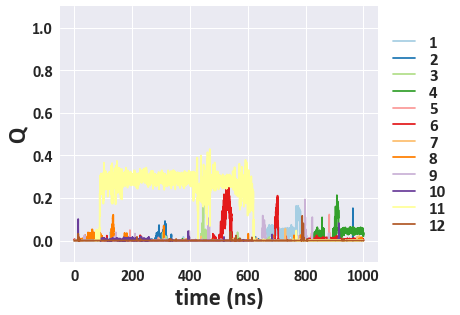

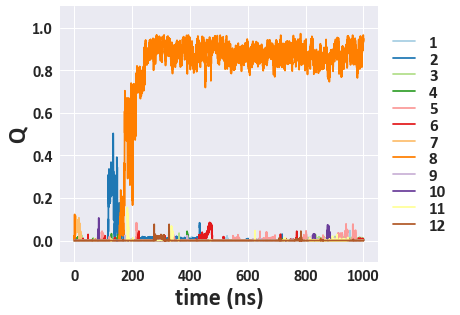

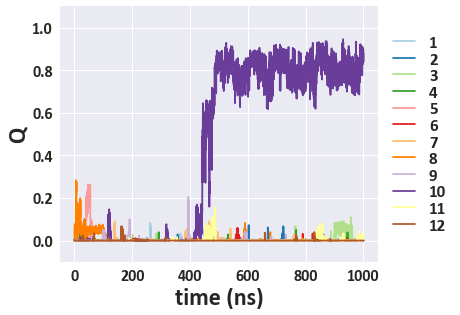

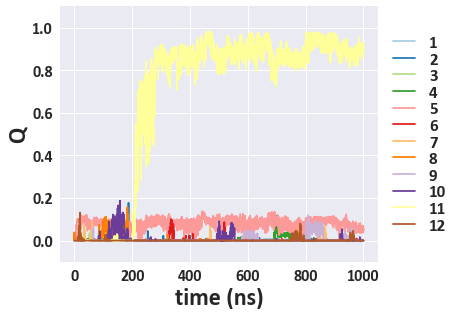

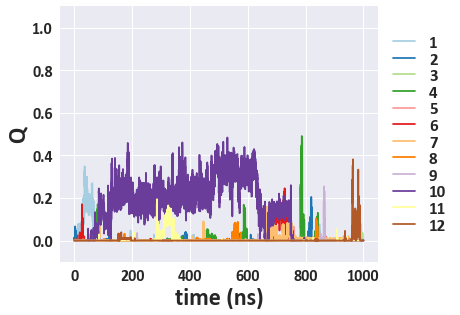

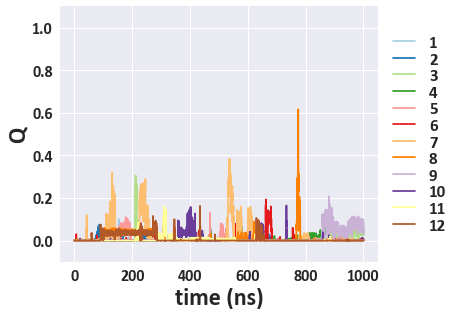

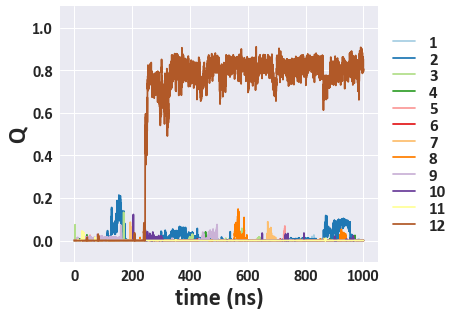

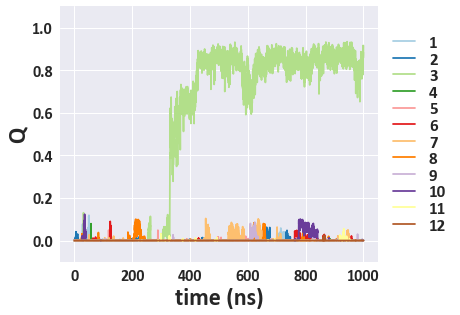

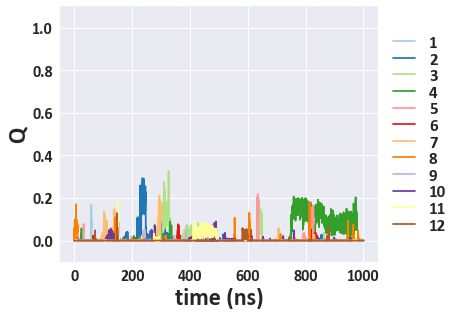

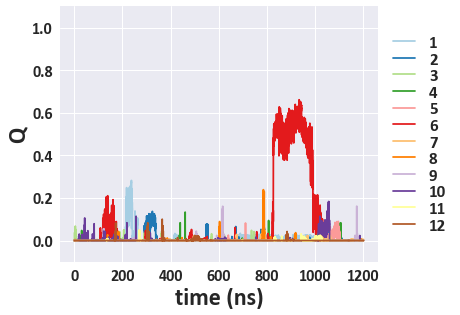

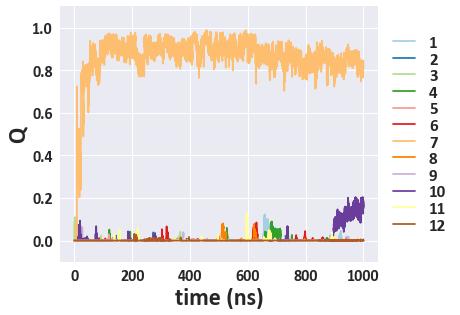

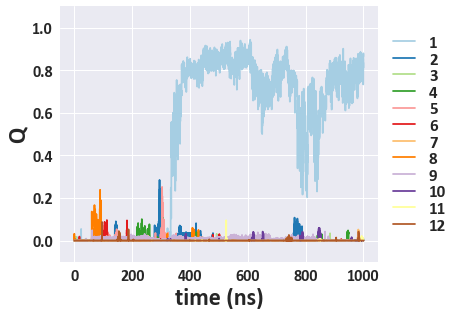

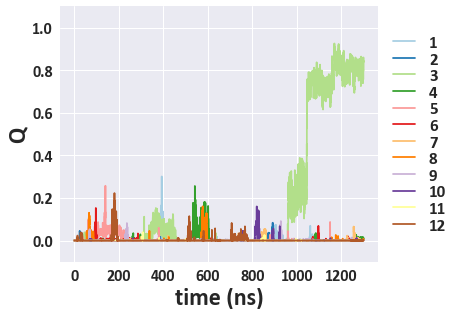

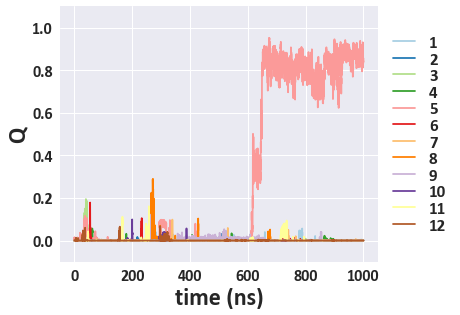

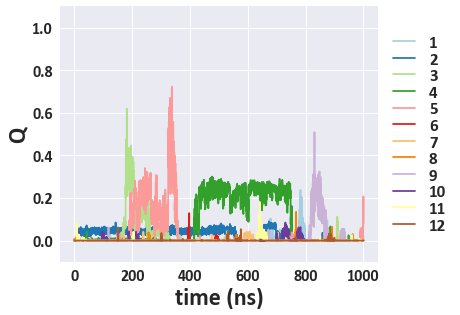

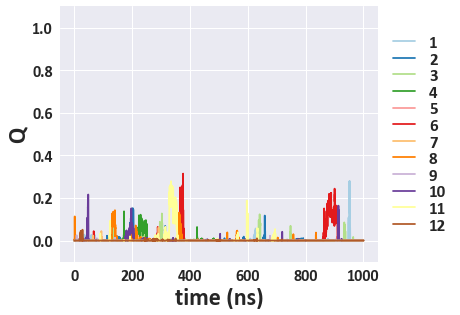

In [72]:
time_step=0.1       #ns
#import pandas as pd
import seaborn as sns
sns.set_palette("Paired",12)
#sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=22)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
for nt in range(1):
    fig, ax = plt.subplots(figsize=(5,4))
    for i in range(1,13):
        data = np.loadtxt('fit'+str(nt)+'_chain'+str(i)+'_Q.cs')
        #print len(data)
        time = np.arange(len(data))*time_step
        ax.plot(time,data,label=str(i))
        #ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
    ax.set_ylabel('Q',fontproperties=font_prop)
    ax.set_xlabel('time (ns)',fontproperties=font_prop)
    plt.ylim(-0.1,1.1)
    #plt.xlim(0,1000)
    #ax.set_xticks(np.linspace(0,1200,7))
    #ax.set_xticklabels([0,200,400,600,800,1000])
    leg=plt.legend(loc='center left', labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.3,bbox_to_anchor=(1,0.5))
    leg.get_frame().set_linewidth(0.0)
    leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(18)
    plt.savefig("fit"+str(nt)+"_Q.png",dpi=600,bbox_inches='tight')
    plt.show()

In [78]:
import mdtraj as md
t_ref=md.load('12con_ref.pdb',top='12con_ref.pdb')
trjname="trj/all/fit"+str(nt)+"_skip10.xtc"
#for nt in [1,2,3,4,5,6,7,8,10,11,12]:
for nt in range(2,53):
    t_con=md.load(trjname,top='begin.pdb')
    for i in range(1,13):
        con_noh=[atom.index for atom in t_con.topology.chain(i).atoms if ((atom.residue.index > (109+6*i) and atom.residue.index <= (114+6*i)) and (atom.name in ['CA', 'CB', 'N', 'C', 'O']))]
        con_rmsds=md.rmsd(t_con,t_ref,0,atom_indices=con_noh)
        outname='fit'+str(nt)+'_chain'+str(i)+'_rmsd.cs'
        wf=open(outname,'w')
        wf.write('#rmsd\n')
        for j in range(len(con_rmsds)):
            wf.write(str(con_rmsds[j])+'\n')
        wf.close()

In [6]:
np.sum(nc.initial_contacts[0])

135

In [3]:
chain=['A','B','C','D','E','F','G','H','I','J','K','L','M']
t_ref=mda.Universe('12con_ref.pdb',top='12con_ref.pdb')
group1=t_ref.select_atoms('segid A and (name C* or name N* or name O* or name S*)')
for nt in range(53,64):
    print nt
    trjname="trj/all/fit"+str(nt)+"_skip10.xtc"
    u=mda.Universe("begin.pdb",trjname)
    for i in range(1,13):
        filename='fit'+str(nt)+'_chain'+str(i)+'_Q_heavyatoms.cs'
        wf=open(filename,'w')
        sel2='segid '+chain[i]+' and (name C* or name N* or name O* or name S*)'
        print i
        group2=t_ref.select_atoms(sel2)
        nc=contacts.Contacts(u,selection=("segid A and (name C* or name N* or name O* or name S*)",sel2),refgroup=(group1,group2),method='soft_cut')
        nc.run()
        bound=nc.timeseries[:,1]
        for b in bound:
            wf.write(str(b)+'\n')
        wf.close()

53
1
2
3
4
5
6
7
8
9
10
11
12
54
1
2
3
4
5
6
7
8
9
10
11
12
55
1
2
3
4
5
6
7
8
9
10
11
12
56
1
2
3
4
5
6
7
8
9
10
11
12
57
1
2
3
4
5
6
7
8
9
10
11
12
58
1
2
3
4
5
6
7
8
9
10
11
12
59
1
2
3
4
5
6
7
8
9
10
11
12
60
1
2
3
4
5
6
7
8
9
10
11
12
61
1
2
3
4
5
6
7
8
9
10
11
12
62
1
2
3
4
5
6
7
8
9
10
11
12
63
1
2
3
4
5
6
7
8
9
10
11
12


In [1]:
cd /home/dongdong/SCR/msm_pdz/complex/12concentration/Q_heavyatoms

/scratch/gpfs/dongdong/msm_pdz/complex/12concentration/Q_heavyatoms


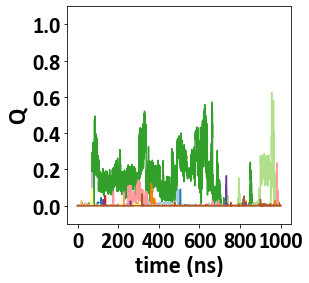

In [16]:
time_step=0.1       #ns
#import pandas as pd
import seaborn as sns
sns.set_palette("Paired",12)
#sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
#for nt in range(36,37):
for nt in [14]:
    fig, ax = plt.subplots(figsize=(4,4))
    for i in range(1,13):
        data = np.loadtxt('fit'+str(nt)+'_chain'+str(i)+'_Q_heavyatoms.cs')[:10001]
        #print len(data)
        time = np.arange(len(data))*time_step
        ax.plot(time,data,label=str(i))
        #ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
    ax.set_ylabel('Q',fontproperties=font_prop)
    ax.set_xlabel('time (ns)',fontproperties=font_prop)
    plt.ylim(-0.1,1.1)
    #plt.xlim(0,1000)
    #ax.set_xticks(np.linspace(0,1200,7))
    #ax.set_xticklabels([0,200,400,600,800,1000])
    #leg=plt.legend(loc='center left', labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.3,bbox_to_anchor=(1,0.5))
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(22)
    plt.savefig("fit"+str(nt)+"_Q2_.png",dpi=600,bbox_inches='tight')
    plt.show()

In [36]:
t_ref=mda.Universe('12con_ref.pdb',top='12con_ref.pdb')
group1=t_ref.select_atoms('segid A')
group2=t_ref.select_atoms('segid B')

In [42]:
nc=contacts.Contacts(u,selection=("segid A","segid B"),refgroup=(group1,group2),method='soft_cut')

In [14]:
from msmbuilder.dataset import dataset
ds = dataset('/home/disk2/wdd/PDZ/12concentration_MSM_Q/h5/Qall/fit1_chain4_Q_.h5')

In [13]:
frames=[]
QQ=[]
for i in range(len(ds[0])):
    frames.append(i)
    QQ.append(np.mean(ds[0][0]))

KeyboardInterrupt: 

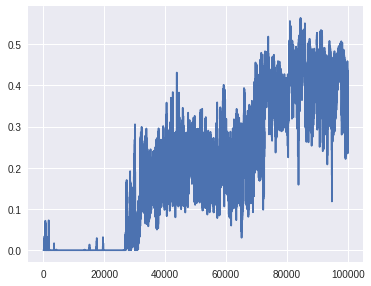

In [45]:
time_step=0.1       #ns
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
fig, ax = plt.subplots(figsize=(6,4.7))
ax.plot(frames, bound)
plt.savefig("fit2chainB_contact.png",dpi=600,bbox_inches='tight')
plt.show()

In [48]:
mda.Universe?

In [20]:
np.mean(ds[0][99900])

0.76493322428339972

In [21]:
ds[0][99900]

array([ 0.77399295,  0.83775704,  0.90987719,  0.66071332,  0.83861203,
        0.87374837,  0.72534715,  0.81754055,  0.81569566,  0.84470654,
        0.71959054,  0.85196588,  0.83647517,  0.81991811,  0.86505795,
        0.86128506,  0.87358699,  0.82112314,  0.84880835,  0.73421934,
        0.880645  ,  0.80359159,  0.57658994,  0.88825935,  0.57519928,
        0.55145573,  0.74807545,  0.7912759 ,  0.48214918,  0.73976411,
        0.60138108,  0.76581723,  0.72568608,  0.67451977,  0.76520538,
        0.85802389,  0.827224  ,  0.88519573,  0.87462557,  0.80364443,
        0.70021181,  0.60571001,  0.83384968,  0.81251517,  0.84515865,
        0.80611946,  0.71930836,  0.76164238,  0.76828521,  0.71487659,
        0.77797322,  0.54976051,  0.83742892,  0.72787548,  0.82184901,
        0.74860945,  0.84820859,  0.8374644 ,  0.53019881,  0.80163973,
        0.75704414,  0.81882159,  0.87431572,  0.86772214,  0.81920993,
        0.74929252,  0.75155794,  0.8901904 ,  0.87249094,  0.81